## Stop Writing For-Loops

#### Husni Almoubayyed, 14th Nov 2017.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### the Zen of Python (aka PEP 20)

In [23]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


#### Simple is better than complex.
#### Complex is better than complicated.
#### Flat is better than nested.
#### Readability counts.


## Imperative Programming: 

- brute force way of getting things done. 
- code says the 'how' of the algorithm.
- usually inefficient.
- easy to think of, hard to read.

## Functional programming
- code says the 'what' of the algorithm
- uses more built-in features -- often makes it much more efficient
- harder to think of, much easier to read

In [134]:
x = np.random.randn(100)
y = x*50

## Ways to avoid for-loops
### 1. Comprehensions:

Comprehensions (whether list or set etc) eliminate binding each element of an interable into C (in which much of python is written) and back.

This is much better than creating e.g. an empty list, looping over it, and using .append() to fill it.

First, the bad way:

In [128]:
for ind, val in enumerate(x):
    if val<0.5:
        x[ind] = x[ind]*2
    else:
        x[ind] = x[ind]/2

In [132]:
x = [val*2 if val<0.5 else val/2 for val in x]

The comprehension way:

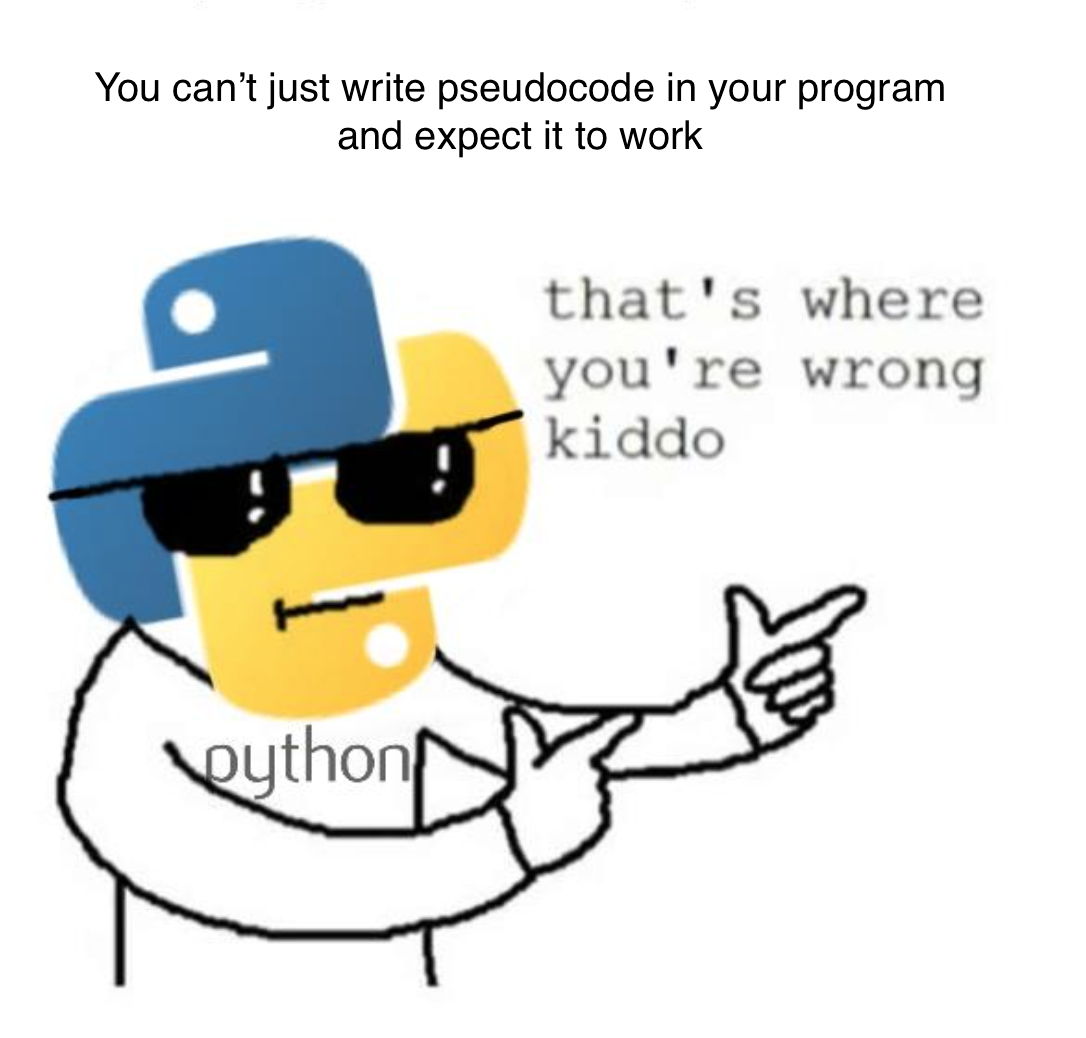

In [125]:
from IPython.display import Image
Image('meme.png',width=400)

Can also do set comprehensions, dictionary comprehensions, etc:

In [86]:
keys = zip(x,y) # will talk about zip later
values = x*y
dictionary = {k:v for k,v in zip(keys,values)}

### Lambda functions

Defining functions on the fly (useful for the `map` function). (FYI not considered best practice in PEP 8)

In [136]:
def func(x):
    x*2
    
# is the same as:
lambda x: x*2

<function __main__.<lambda>>

### $2.$ The `map` built-in function

`map(function,iterable)`
basically does the same as 
`[function(i) for i in iterable]`

say, we wanna convert x and y from radians to degrees:

In [145]:
for array in [x,y]:
    for i in range(len(array)):
        array[i] = array[i]*180/np.pi

# using map
x,y = map(lambda array: array*180/np.pi,(x,y))

### $3.$ functools: `filter` & `reduce` 

`filter` applies a condition to a structure:

In [144]:
filter(lambda i: i*10>sum(y), y)

[253449.24736356249,
 233552.59671246482,
 351832.92157498066,
 261970.11381479833,
 339919.59924053081,
 494527.31058738276,
 311212.94785240316,
 241716.16762054697,
 381728.2711696506,
 272255.57135371887,
 256012.46101780751]

`reduce` calls a function over and over until it gets a single value, e.g.

In [139]:
reduce(lambda xi,xj: xi+xj, x)

46018.595878292777

### $4. $ itertools

lots of useful functions for efficient iteration in python. e.g. compress()

In [120]:
from itertools import compress
y_filter = y>30
filtered_x = list(compress(x,filtered_y))

### $5.$ Recursion

Recursion can be slower or faster than iteration in python, depending on context. But for some examples, recursion makes more sense to use:

e.g. to calculate a factorial, we can use Imperative programming:

In [35]:
def fact(n):
    fact = 1
    if n<= 1:
        return 1
    for i in range(1,n):
        fact = i * fact
    return fact
print fact(10)

362880


or recursion:

In [36]:
def fact(n):
    return 1 if n <= 1 else n * fact(n-1)
print fact(10)

3628800


### $6.$ Zip

e.g. turning x,y vectors into 2d vector of tuples containing positions

In [81]:
%%time
bad_indices=[]
pos_2d = []
for i in range(len(x)):
    x_i = x[i]
    y_i = y[i]
    if abs(y_i)<100:
        pos_2d.append((x_i,y_i))

CPU times: user 888 µs, sys: 738 µs, total: 1.63 ms
Wall time: 955 µs


using the zip function:

In [80]:
%%time 
pos_2d = [(i,j) for i,j in zip(x,y) if abs(j)<100]

CPU times: user 223 µs, sys: 78 µs, total: 301 µs
Wall time: 260 µs


to unzip, just use `*zip`

## $7.$ Generators

In [167]:
def generator(n):
    for i in range(n):
        yield i**2

In [171]:
generator(5)

<generator object generator at 0x104c3ec30>

or better yet, we can create generators in a similar way to a list comprehension:

In [169]:
(i**2 for i in range(5))

<generator object <genexpr> at 0x104c3ebe0>

and then to unpack it (which you would not need in a lot of cases), we can do something like:

In [170]:
list((i**2 for i in range(5)))

[0, 1, 4, 9, 16]

## The Take-away:

You **can** literally eliminate every single for-loop in your code using these tools. This might not always be a good idea, but if you find your code is taking too long to run, or becoming a hard-to-read black-box, and find nested loops iterating millions of time, trying to eliminate for-loops and using functional programming is probably the first thing to invest your time doing, and in the end, doing so will help build good habits/best practices.